In [41]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVC, LinearSVC

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


import data

In [9]:
X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
X_blind_default = pd.read_csv('../dataset/blind_test_data.csv', header=None).values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train_default, X_test_default, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
y_train = y_train.ravel()

pre-process

In [22]:
index_for_removal = np.array(
    [
        0, 10, 14, 17, 25, 26, 35, 39, 49, 59, 62,
    ]
)
X_train_zero_variance = np.delete(X_train_default, index_for_removal, 1)
X_test_zero_variance = np.delete(X_test_default, index_for_removal, 1)
X_blind_zero_variance = np.delete(X_test_default, index_for_removal, 1)


select_univariate = SelectPercentile(percentile=90)
# select_univariate.fit(X_train_zero_variance, y_train)
# X_train_univariate = select_univariate.transform(X_train_zero_variance)
# X_test_univariate = select_univariate.transform(X_test_zero_variance)

rf = RandomForestClassifier(
    n_estimators=200,
    max_features=3,
).fit(X_train_default, y_train)

select_sfm = SelectFromModel(
    rf,
    threshold='0.1*mean',
)
# select_sfm.fit(X_train_univariate, y_train)
# X_train_from_model = select_sfm.transform(X_train_univariate)
# X_test_from_model = select_sfm.transform(X_test_univariate)

select_rfe = RFE(
    RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    n_features_to_select=40
)

# select_rfe.fit(X_train_from_model, y_train)
# X_train_iterative = select_rfe.transform(X_train_from_model)
# X_test_iterative = select_rfe.transform(X_test_from_model)


standard
scaler: default and post - feature
selection

In [11]:
scaler_standard_default = StandardScaler().fit(X_train_default)
X_train_standard_default = scaler_standard_default.transform(X_train_default)
X_test_standard_default = scaler_standard_default.transform(X_test_default)

scaler_standard_variance = StandardScaler().fit(X_train_zero_variance)
X_train_standard_variance = scaler_standard_variance.transform(X_train_zero_variance)
X_test_standard_variance = scaler_standard_variance.transform(X_test_zero_variance)
#
# scaler_standard_refined = StandardScaler().fit(X_train_iterative)
# X_train_standard_refined = scaler_standard_refined.transform(X_train_iterative)
# X_test_standard_refined = scaler_standard_refined.transform(X_test_iterative)


robust
scaler: default and post - feature
selection

In [12]:

scaler_robust_default = RobustScaler().fit(X_train_default)
X_train_robust_default = scaler_robust_default.transform(X_train_default)
X_test_robust_default = scaler_robust_default.transform(X_test_default)

scaler_robust_variance = RobustScaler().fit(X_train_zero_variance)
X_train_robust_variance = scaler_robust_variance.transform(X_train_zero_variance)
X_test_robust_variance = scaler_robust_variance.transform(X_test_zero_variance)
#
# scaler_robust_refined = RobustScaler().fit(X_train_iterative)
# X_train_robust_refined = scaler_robust_refined.transform(X_train_iterative)
# X_test_robust_refined = scaler_robust_refined.transform(X_test_iterative)


minmax scaler: default and post-feature selection

In [13]:
scaler_minmax_default = MinMaxScaler().fit(X_train_default)
X_train_minmax_default = scaler_minmax_default.transform(X_train_default)
X_test_minmax_default = scaler_minmax_default.transform(X_test_default)

scaler_minmax_variance = MinMaxScaler().fit(X_train_zero_variance)
X_train_minmax_variance = scaler_minmax_variance.transform(X_train_zero_variance)
X_test_minmax_variance = scaler_minmax_variance.transform(X_test_zero_variance)
#
# scaler_minmax_refined = MinMaxScaler().fit(X_train_iterative)
# X_train_minmax_refined = scaler_minmax_refined.transform(X_train_iterative)
# X_test_minmax_refined = scaler_minmax_refined.transform(X_test_iterative)


PCA: default and post - feature
selection

In [14]:
pca_default = PCA(n_components=56, random_state=42)
X_train_pca_default = pca_default.fit_transform(X_train_standard_default)
X_test_pca_default = pca_default.transform(X_test_standard_default)

pca_refined = PCA(n_components=37, random_state=42)
# X_train_pca_refined = pca_refined.fit_transform(X_train_standard_refined)
# X_test_pca_refined = pca_refined.transform(X_test_standard_refined)


In [140]:

knn_pipeline = make_pipeline(
    select_univariate,
    select_sfm,
    select_rfe,
    KNeighborsClassifier(
        n_neighbors=5,
    )
)

logreg = LogisticRegression(C=4.736842, random_state=42)
logreg_pipeline = make_pipeline(
    MinMaxScaler(),
    logreg
)

lsvc = CalibratedClassifierCV(LinearSVC(C=1.842105, random_state=42))
lsvc_pipeline = make_pipeline(
    select_univariate,
    select_sfm,
    select_rfe,
    MinMaxScaler(),
    lsvc
)



mnb = MultinomialNB(alpha=0.210526)
mnb_pipeline = make_pipeline(
    mnb
)

rf = RandomForestClassifier(
    n_estimators=400,
    max_features=3,
    random_state=42
)
rf_pipeline = make_pipeline(
    rf
)

gbrt = GradientBoostingClassifier(
    n_estimators=400,
    max_depth=1,
    learning_rate=0.1,
    random_state=42
)
gbrt_pipeline = make_pipeline(
    gbrt
)

ksvm_pipeline = make_pipeline(
    MinMaxScaler(),
    CalibratedClassifierCV(SVC(
        kernel='rbf',
        C=5,
        degree=1,
        random_state=42,
        probability=True
    ))
)

mlp = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=512,
    alpha=0.01,
    random_state=42,
)
mlp_pipeline = make_pipeline(
    MinMaxScaler(),
    mlp
)

votingClf = VotingClassifier(
    [
        ('clf1', logreg),
        ('clf2', rf)
    ],
    voting='soft',
)
adaCombo = AdaBoostClassifier(base_estimator=votingClf)
# adaCombo.fit(X_train_pca, y_train)


In [148]:

estimators = [
    ('ada', adaCombo),
    ("mlp", mlp_pipeline),
    ("gbrt", gbrt_pipeline),
    ("ksvm", ksvm_pipeline),
    # # # ("rf", rf_pipeline),
    # # # ("mnb", mnb_pipeline),
    # # ("knn", knn_pipeline),
    ("lsvc", lsvc_pipeline),
    ("mnb", mnb_pipeline),
    # ("logreg", logreg_pipeline),
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=logreg_pipeline,
)

## Stacking

In [149]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    stacking_classifier.fit(X_train_default, y_train)

print(stacking_classifier.score(X_train_default, y_train))
print(stacking_classifier.score(X_test_default, y_test))


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 14 25 26 35 39 59 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 14 25 26 35 39 42 59 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/

0.9876056338028169
0.9481981981981982


In [150]:
y_pred_stacking = stacking_classifier.predict(X_test_default)
y_pred_proba_stacking = stacking_classifier.predict_proba(X_test_default)

In [151]:

print(roc_auc_score(y_test, stacking_classifier.predict_proba(X_test_default), multi_class='ovr'))

0.9932607934053901


In [152]:
f1_stacking = f1_score(
    y_true=y_test,
    y_pred=y_pred_stacking,
    average=None
)
print(f1_stacking)

[1.         0.87804878 0.93877551 0.96774194 0.93913043 0.98214286
 0.94488189 0.96062992 0.88      ]


In [153]:
y_pred_blind_stacking = stacking_classifier.predict(X_blind_default)
pd.DataFrame(y_pred_blind_stacking).to_csv('Rimer_Jason_test.csv', index=False, header=False)


## Voting

In [90]:
voting_classifier = VotingClassifier(
    estimators=estimators,
    voting='soft',
)
voting_classifier.fit(X_train_default, y_train)
print(voting_classifier.score(X_train_default, y_train))
print(voting_classifier.score(X_test_default, y_test))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

0.9830985915492958
0.9481981981981982


In [91]:
y_pred_voting = voting_classifier.predict(X_test_default)
y_pred_proba_voting = voting_classifier.predict_proba(X_test_default)

[[6.28546582e-01 7.31545672e-04 3.05911807e-03 ... 3.50743637e-03
  1.24911072e-02 1.57078119e-01]
 [7.53537822e-01 6.27534146e-03 3.45301528e-03 ... 2.67007058e-03
  6.75260120e-02 2.25606755e-02]
 [2.91340334e-03 2.49398873e-03 1.41093944e-01 ... 8.87191579e-03
  8.13215668e-03 4.19057065e-02]
 ...
 [6.33257729e-03 5.36081929e-02 5.47359347e-02 ... 3.74083925e-01
  6.91464887e-02 3.71518785e-01]
 [6.20522469e-03 9.67043773e-03 2.64580365e-03 ... 3.16215515e-02
  9.72787389e-03 4.34659701e-02]
 [2.37540968e-02 1.19929275e-03 6.74961348e-03 ... 3.66718586e-02
  4.32072764e-02 2.77370656e-02]]


In [86]:
print(roc_auc_score(y_test, y_pred_proba_voting, multi_class='ovr'))
f1_stacking = f1_score(
    y_true=y_test,
    y_pred=y_pred_voting,
    average=None
)
print(f1_stacking)

0.994494455861304
[0.99236641 0.9047619  0.94117647 0.98412698 0.94736842 0.96551724
 0.953125   0.953125   0.86956522]


In [110]:
y_pred_blind_voting = voting_classifier.predict(X_blind_default)
pd.DataFrame(y_pred_blind_voting).to_csv('Rimer_Jason_voting.csv', index=False, header=False)


# Viewing Images

In [53]:
print(stacking_classifier.predict([X[666]]))
print(y[666])


[3]
[3]


In [163]:
images = pd.read_csv("../dataset/raw_images.csv").values

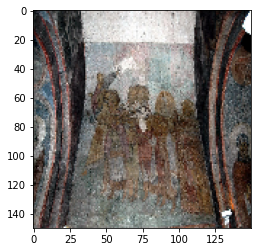

In [165]:
plt.imshow(images[712].reshape(150,150,3))

In [50]:
print('hw2')

hw2


## Demo

In [174]:
index_demo = 34
y_pred_demo = stacking_classifier.predict([X_blind_default[index_demo]])

In [175]:
print(y_pred_demo)

[2]


In [176]:
y_preds_demo = {}
for i in range(len(stacking_classifier.estimators_)):
    clf = stacking_classifier.estimators_[i]
    y_preds_demo[i] = clf.predict([X_blind_default[index_demo]])

In [177]:
pd.DataFrame(y_preds_demo)

,0,1,2,3,4,5
0,2,2,2,2,2,2
